In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind

In [55]:
stud=pd.read_csv("C:\\Users\Sasha\Documents\stud_math.csv")

In [3]:
pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",50)

In [4]:
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [56]:
len(stud)

395

## Предварительный анализ данных

In [60]:
# Проведем первичную обработку данных. Наша задача сейчас - заменить все NaN на None. Напишем для этого функцию и 
# применим поочередно ко всем колонкам, где есть нулевые значения
def replace_null(x):
    if pd.isnull(x) or x=="nan" or x.strip()=="":
        return None
    else: 
        return x

In [53]:
# сумма значений по столбцу school равна 395. Значит, нулевых значений нет.
stud.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [54]:
# сумма значений по столбцу sex равна 395. Значит, нулевых значений нет.
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [45]:
stud.address=stud.address.apply(replace_null)
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [48]:
stud.famsize=stud.famsize.apply(replace_null)

In [50]:
stud.Pstatus=stud.Pstatus.apply(replace_null)

In [51]:
# сумма значений по колонке Mjob не равна 395. Значит, в колонке присутствуют нулевые значения. Следовательно, применяем нашу функцию
stud.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [52]:
stud.Mjob=stud.Mjob.apply(replace_null)

In [55]:
stud.Fjob=stud.Fjob.apply(replace_null)

In [59]:
# сумма значений по столбцу reason не равна 395. Значит, есть нулевые значения. Применим нашу функцию
stud.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [61]:
stud.reason=stud.reason.apply(replace_null)

In [62]:
# сумма значений по столбцу guardian не равна 395. Применяем функцию
stud.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [63]:
stud.guardian=stud.guardian.apply(replace_null)

In [64]:
# сумма значений по столбцу schoolsup не равна 395. Применяем функцию
stud.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [65]:
stud.schoolsup=stud.schoolsup.apply(replace_null)

In [67]:
# сумма значений по стоблцу famsup не равна 395. Применяем функцию
stud.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

In [68]:
stud.famsup=stud.famsup.apply(replace_null)

In [69]:
# сумма значений по столбцу paid не равна 395. Применяем функцию
stud.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [70]:
stud.paid=stud.paid.apply(replace_null)

In [71]:
stud.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [72]:
stud.activities=stud.activities.apply(replace_null)

In [73]:
stud.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [74]:
stud.nursery=stud.nursery.apply(replace_null)

In [75]:
stud.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [76]:
stud.higher=stud.higher.apply(replace_null)

In [77]:
stud.internet=stud.internet.apply(replace_null)

In [78]:
stud.romantic=stud.romantic.apply(replace_null)

In [5]:
# Выведем список всех колонок
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [17]:
# Видим некую подозрительную колонку с отрицательными значениями - studytime, granular. Вывдедем информацию об этой колонке,
# чтобы при необходимости ее удалить. Также строим график значений, которые есть в этой колонке
stud["studytime, granular"].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

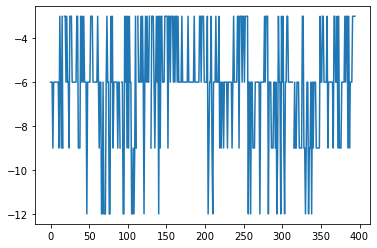

In [16]:
plt.plot(stud["studytime, granular"])

In [43]:
# Данная колонка не имеет смысла. Удаляем
stud.drop(["studytime, granular"], inplace=True, axis=1)

In [7]:
# Выведем информацию о нашем датасете.
stud.info()
# Итак, мы получили одну колонку типа integer, 11 колонок типа float, и все остальные - типа object. Всего колонок - 29.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

## Анализ числовых перменных

In [27]:
# Сначала разберем колонки, содержащие числа (тип int и float). Начнем с колонки age
stud.age.value_counts()
# в этой колонке нет ничего необычного. Размах возрастов соответствует заявленному в условии задачи. Выбросов нет.

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

<AxesSubplot:>

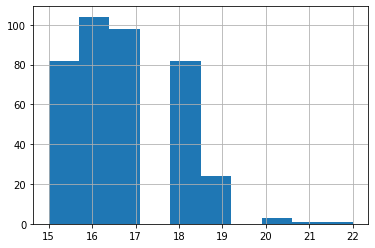

In [26]:
stud.age.hist()

<AxesSubplot:xlabel='age'>

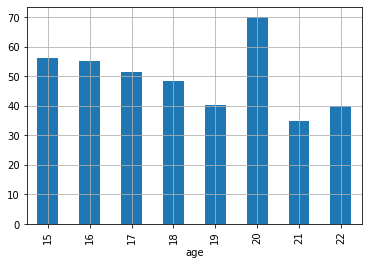

In [85]:
# самый высокий средний балл - у двадцатилетних студентов. Скорее всего, это случайный результат. Какой-либо четкой зависимости
# балла от возраста нет
stud.groupby("age")["score"].mean().plot(kind="bar", grid=True)

In [21]:
stud.Medu.value_counts()
# в этой колонке также ничего необычного. У большинства матерей - высшее образование

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

<AxesSubplot:xlabel='Medu'>

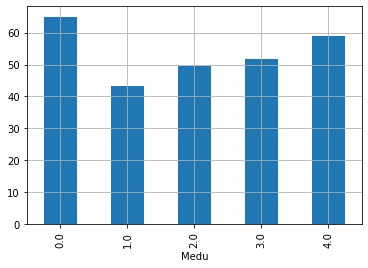

In [87]:
# удивительно, что самый высокий средний балл - у студентов, имеющих мать без образования. Далее балл нарастает с ростом 
# образования матери
stud.groupby("Medu")["score"].mean().plot(kind="bar", grid=True)

In [8]:
stud.Fedu.value_counts()
# а вот в этой колонке есть выброс. Значение 40.0, очевидно, получилось, когда не туда поставили запятую. Заменим его на 4.0
# Мы видим, что большинство отцов имеет образование 5-9 классов

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [9]:
stud.Fedu=stud.Fedu.apply(lambda x: 4.0 if x==40.0 else x)

<AxesSubplot:xlabel='Fedu'>

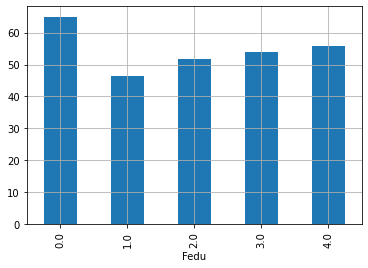

In [91]:
# странный тренд: самый высокий средний балл у студентов, у которых отец без образования. Далее балл нарастает с ростом 
# образования отца
stud.groupby("Fedu")["score"].mean().plot(kind="bar", grid=True)

In [31]:
stud.traveltime.value_counts()
# выбросов нет, большинство детей живет очень близко от школы (менее 15 мин дороги)

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

<AxesSubplot:xlabel='traveltime'>

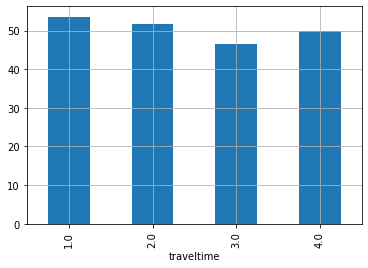

In [90]:
# средний балл практически не зависит от времени в пути до школы. Максимальный балл - у студентов, у которых школа очень близко
stud.groupby("traveltime")["score"].mean().plot(kind="bar", grid=True)

In [32]:
stud.studytime.value_counts()
# выбросов нет. Большинство детей учится от 2 до 5 часов помимо школы в неделю

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

<AxesSubplot:>

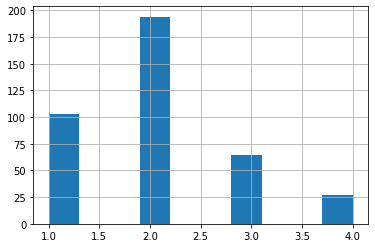

In [34]:
stud.studytime.hist()

<AxesSubplot:xlabel='studytime'>

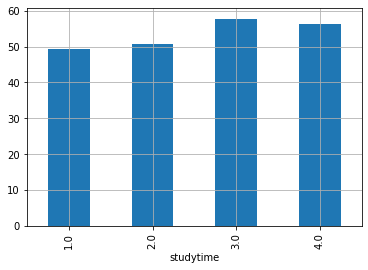

In [93]:
# максимальный балл - у студентов, которые проводят больше времени за дополнительными занятиями
stud.groupby("studytime")["score"].mean().plot(kind="bar", grid=True)

In [33]:
stud.failures.value_counts()
# выбросов нет. У большинства студентов не было внеучебных неудач

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

<AxesSubplot:xlabel='failures'>

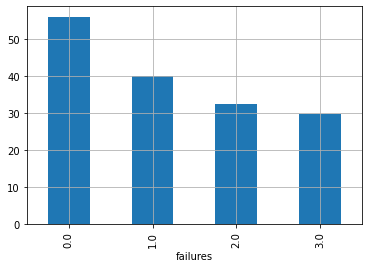

In [95]:
# Прослеживается четкий тренд на снижение балла по математике при увеличении количества внеучебных неудач
stud.groupby("failures")["score"].mean().plot(kind="bar", grid=True)

In [10]:
stud.famrel.value_counts()
# а вот здесь есть одно значение, не имеющее смысла. Заменим его на None с помощью lambda функции

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [11]:
stud.famrel=stud.famrel.apply(lambda x: None if x==-1.0 else x)
stud.famrel.value_counts()
# видим, что у большинства детей хорошие отношения в семье

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

<AxesSubplot:xlabel='famrel'>

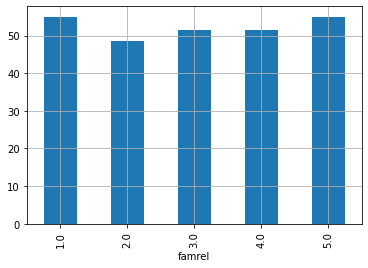

In [97]:
# Удивительно, что средний балл у студентов, у которых очень плохие или очень хорошие отношения в семье, практически 
# не отличается
stud.groupby("famrel")["score"].mean().plot(kind="bar", grid=True)

In [37]:
stud.freetime.value_counts()
# ничего необычного, выбросов нет

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

<AxesSubplot:>

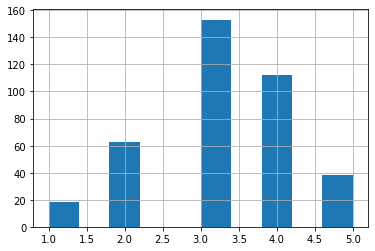

In [38]:
stud.freetime.hist()
# распределение свободного времени у учеников достаточно близко к нормальному

<AxesSubplot:xlabel='freetime'>

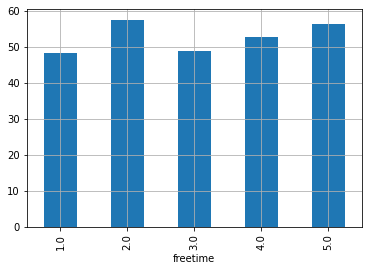

In [99]:
# какого-либо четкой зависимости балла от количества свободного времени у студентов не прослеживается
stud.groupby("freetime")["score"].mean().plot(kind="bar", grid=True)

In [39]:
stud.goout.value_counts()
# Ничего необычного, выбросов нет

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

<AxesSubplot:>

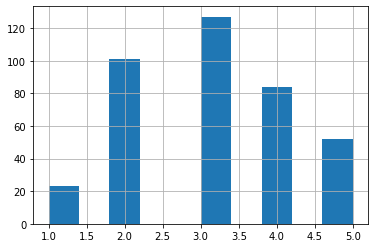

In [40]:
stud.goout.hist()
# распределение времени, проведенного с друзьями, также близко к нормальному

<AxesSubplot:xlabel='goout'>

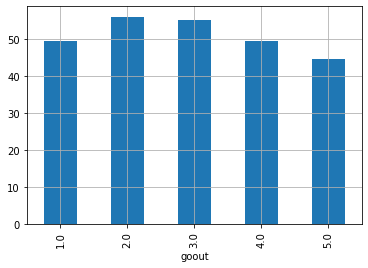

In [101]:
# максимальный средний балл у тех студентов, которые проводят с друзьями не очень много и не очень мало свободного времени
stud.groupby("goout")["score"].mean().plot(kind="bar", grid=True)

In [41]:
stud.health.value_counts()
# у большинства студентов - отличное состояние здоровья. Выбросов нет

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

<AxesSubplot:xlabel='health'>

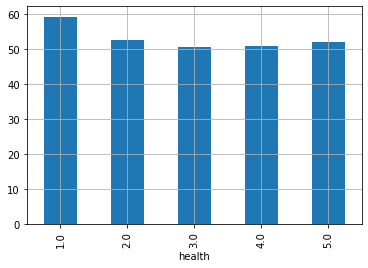

In [104]:
# удивительно, но самый высокий средний балл - у студентов с плохим здоровьем.
stud.groupby("health")["score"].mean().plot(kind="bar", grid=True)

In [12]:
stud.absences.value_counts()
# В столбце с пропусками занятий есть два выброса - 212 и 385. Проверим, действительно ли это выбросы

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


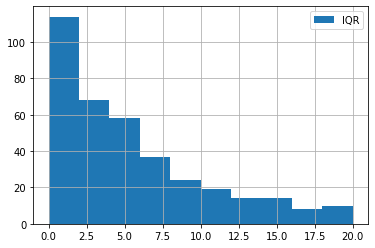

In [13]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(label = 'IQR')
 
plt.legend();

In [49]:
# верхняя граница выбросов - 20. Но у нас в датасете присутствует 17 записей, где количество пропусков больше 20. 
# Мы не можем выбросить столько записей при общем количестве 395 (4.3%)
# Кроме того, данное распределение не является нормальным (больше похоже на экспоненту). А наш критерий "плюс-минус полтора 
# межквартильных расстояния" работает только для нормального распределения. Таким образом, мы не выбрасываем
# ВСЕ значения, которые больше 20. Нас интересует только аномальное количество пропусков (212 и 385). Приглядимся к ним получше.
len(stud[stud.absences>20])

17

In [50]:
stud[(stud.absences==212)| (stud.absences==385)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [14]:
# количество пропусков 385 не соответствует полученной высокой оценке по математике (85.0). Следовательно, мы можем его удалить,
# т.к. данное значение будет мешать нам анализировать общую зависимость полученной оценки от количества пропусков (предположительно, 
# чем больше пропусков, тем ниже оценка). Этот случай - аномальный, т.к. очень большому количеству пропусков соответствует 
# высокая оценка. Второй выброс (212) также не соответствует неплохой оценке по математике (45.0). 
# Следовательно, удаляем оба выброса
stud.absences=stud.absences.apply(lambda x: None if x==212 or x==385 else x)
stud.absences.value_counts()

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
13.0      2
15.0      2
11.0      2
38.0      1
56.0      1
23.0      1
24.0      1
25.0      1
40.0      1
17.0      1
75.0      1
21.0      1
28.0      1
19.0      1
26.0      1
30.0      1
54.0      1
Name: absences, dtype: int64

<AxesSubplot:xlabel='absences'>

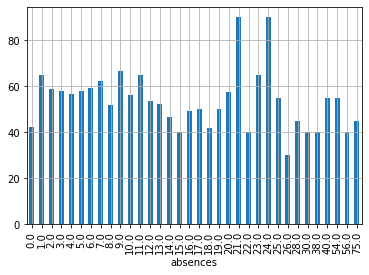

In [107]:
# Нет какой-либо четкой зависимости среднего балла от количества пропусков. Однако, прослеживается некий общий тренд снижения 
# среднего балла при увеличении количества пропусков
stud.groupby("absences")["score"].mean().plot(kind="bar", grid=True)

In [51]:
stud.score.value_counts()
# итоговый балл - очень важный параметр. Как видим, в столбце с баллами выбросов нет. 

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

In [109]:
stud.loc[:,["score"]].info()
# Как мы видим, в колонке с баллами есть 6 пустых значений.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:>

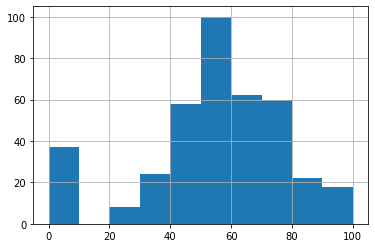

In [15]:
stud.score.hist()
# из гистограммы распределения оценок видим, что довольно большая группа студентов (37 человек) получила 0 баллов. В дальнейшем
# сосредоточим свое внимание именно на этой группе студентов. Остальные студенты распределены приблизительно нормально

## Построение матрицы корреляции для числовых переменных

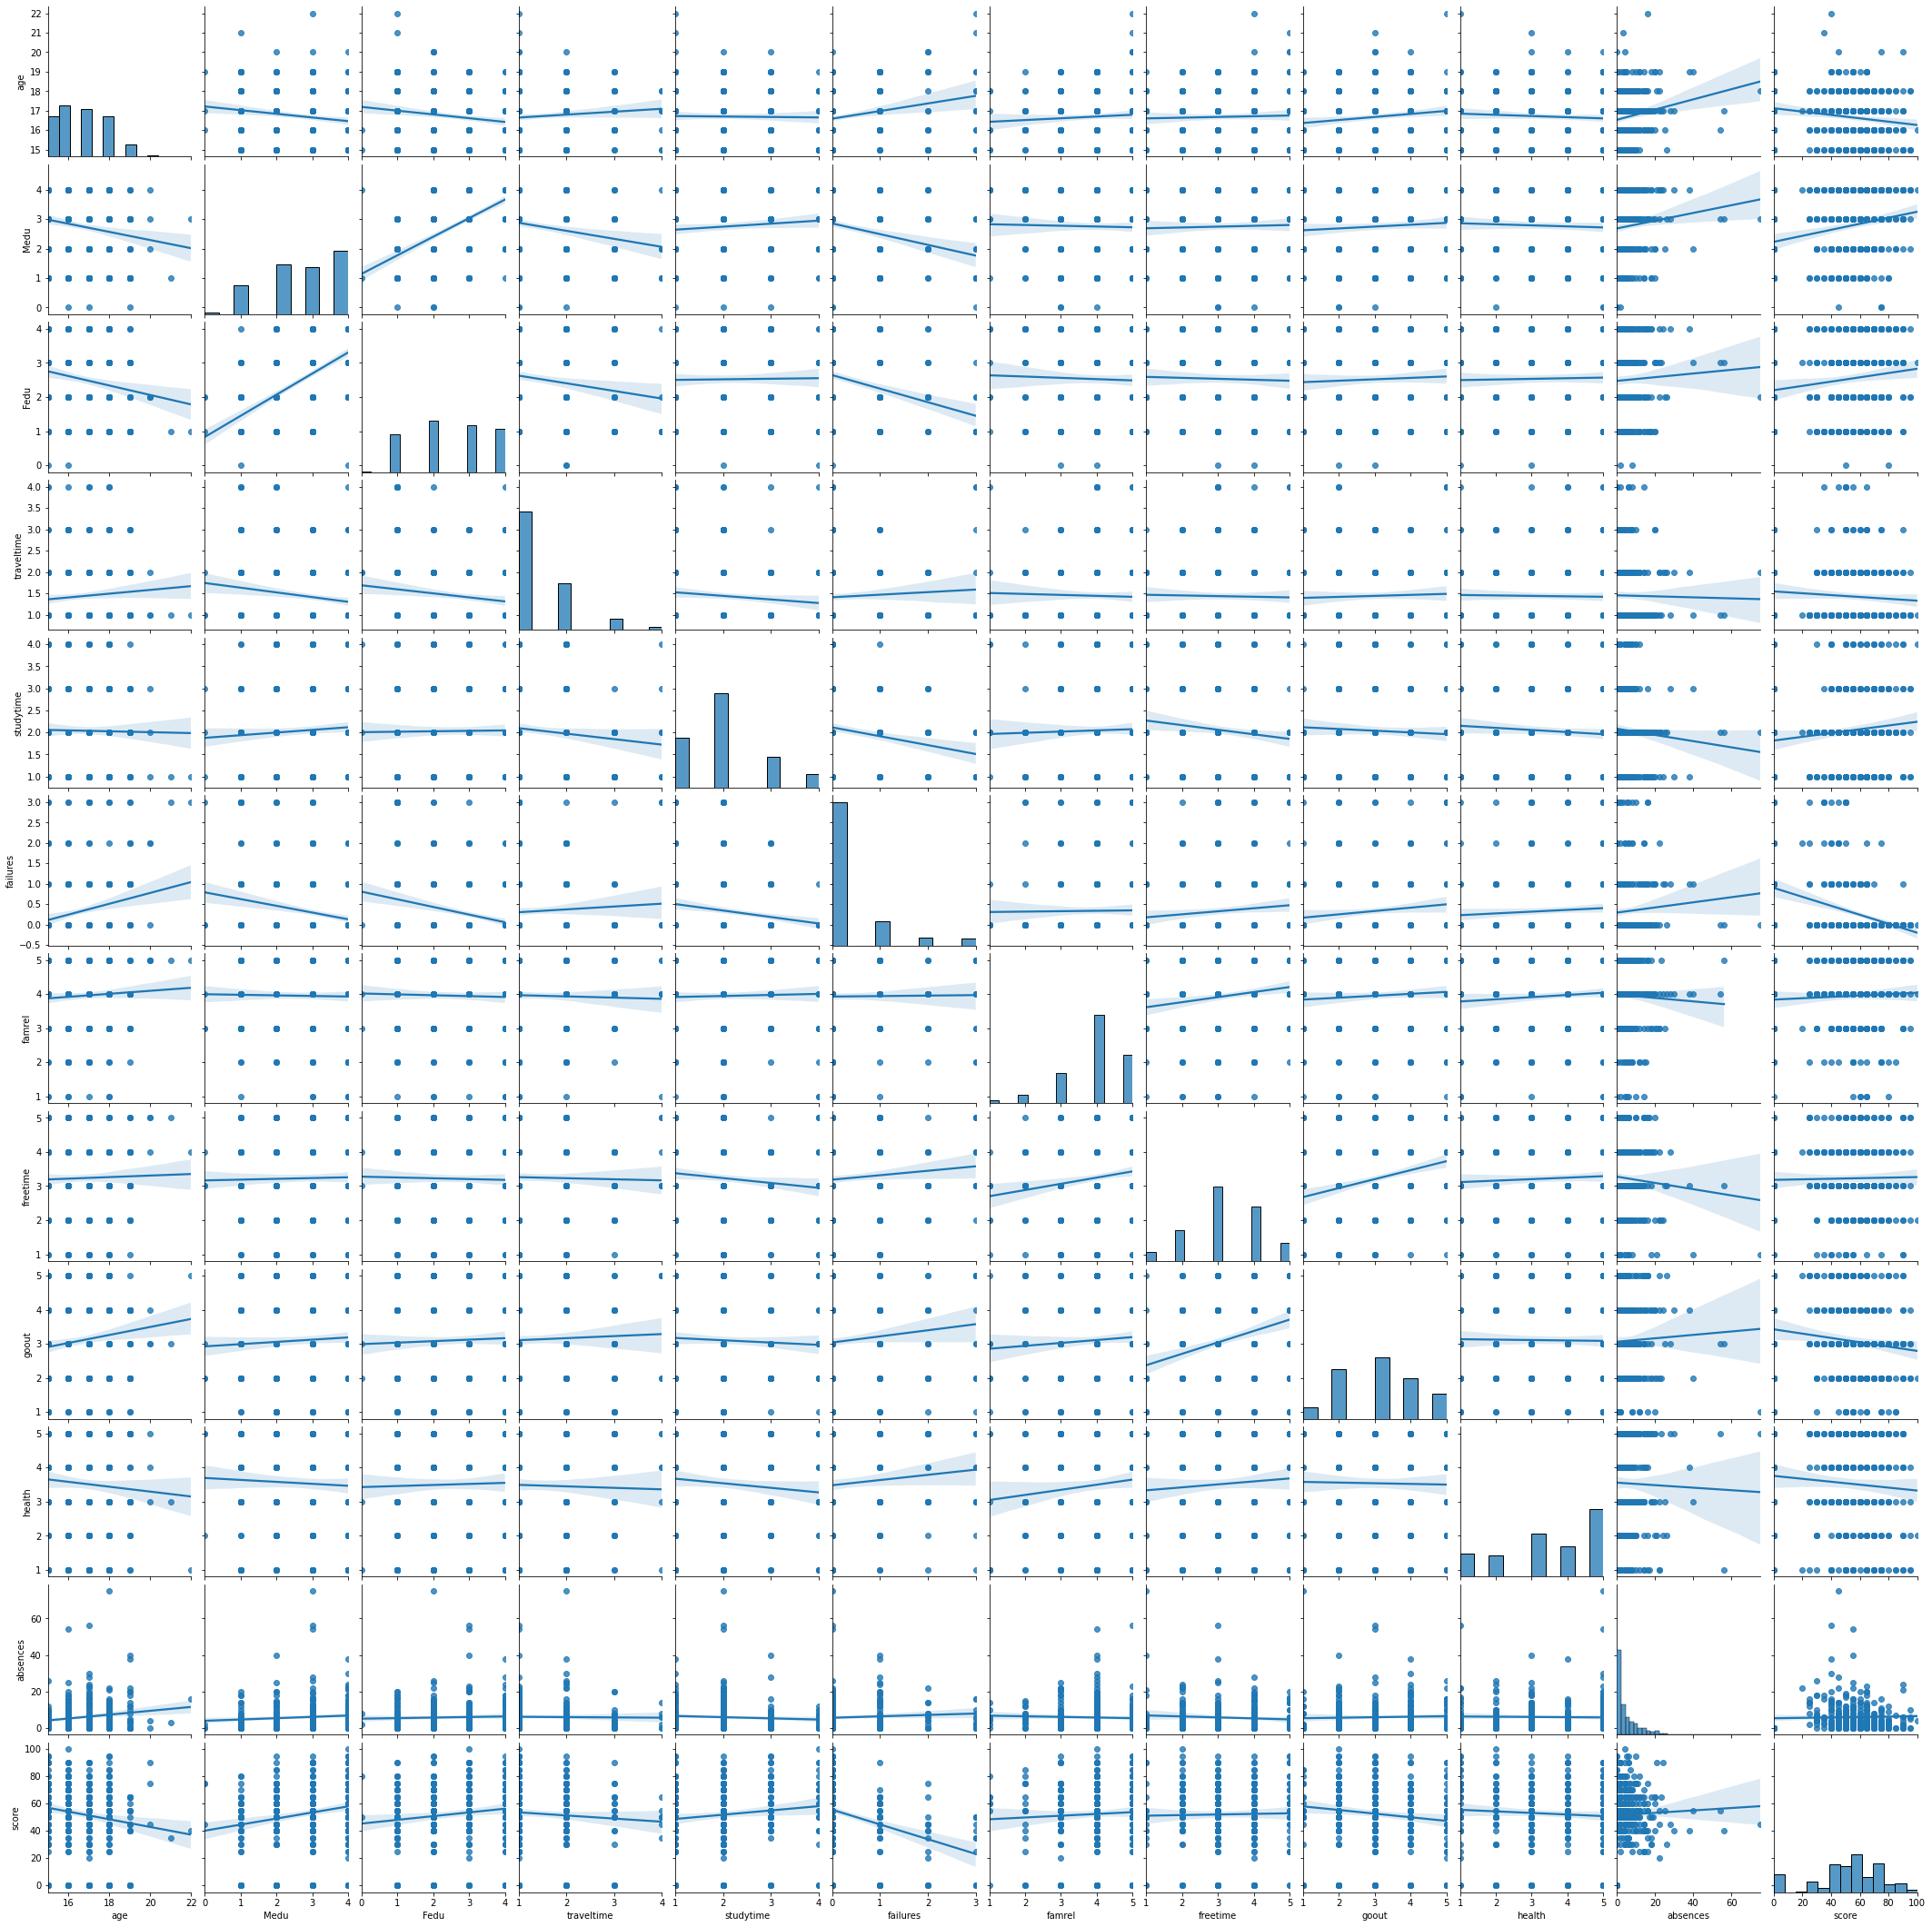

In [16]:
sns.pairplot(stud, kind="reg")

In [18]:
stud.corr()
# построим матрицу корреляций. Как ни странно, мы видим очень слабую корреляцию количества пропусков с оценкой. Наибольший коэффициент
# корреляции (по модулю) - с количеством внеучебных неудач (чем больше неудач, тем хуже оценка). Это мы видели и ранее.
# Далее идет образование матери (чем выше образование матери, тем лучше оценка). Но мы помним, что макисмальный балл у тех студентов,
# у которых мать вообще не имеет образования.
# Кроме того, мы видим отрицательную корреляцию с возрастом (чем старше студент, тем хуже оценку он получает). Ранее мы видели, что
# максимальный балл у студентов наблюдается в возрасте 20 лет.
# Следующий важный фактор - образование отца (чем оно выше, чем лучше оценка). Но выше было показано, что максимальный балл 
# наблюдается у тех студентов, где отец вообще не имеет образования.
# Лочигный фактор - время на учебу помимо школы - также имеет положительную корреляцию (чем больше студент проводит времени 
# за учебой вне школы, тем лучше балл). И еще более логично выглядит то, что чем меньше студент проводит времени с друзьями, 
# тем лучше его балл (отрицательная корреляции с goout). 
# В целом, мы здесь получили два неожиданных результата: 1. оценка по математике сильнее всего связана с количеством внеучебных
# неудач 2. оценка по математике слабо зависит от количества пропусков.
# Все остальные переменные (время в дороге до школы, семейные отношения, свободное время, здоровье) очень слабо коррелируют
# с итоговой оценкой.

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.063539,0.029023,0.135107,-0.065946,0.166773,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.020896,0.025335,0.064164,-0.045051,0.097295,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.031081,-0.025892,0.042663,0.023862,0.040514,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.028220,-0.021937,0.037636,-0.021531,-0.014040,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.028918,-0.121969,-0.051280,-0.080016,-0.067734,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.011942,0.098382,0.120914,0.081284,0.069703,-0.344338
famrel,0.063539,-0.020896,-0.031081,-0.028220,0.028918,0.011942,1.000000,0.164324,0.069241,0.097910,-0.041527,0.051219
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.164324,1.000000,0.296437,0.061575,-0.070416,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.069241,0.296437,1.000000,-0.015608,0.036836,-0.129685
health,-0.065946,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.097910,0.061575,-0.015608,1.000000,-0.021752,-0.070460


## Анализ номинативных переменных

Пройдемся последовательно по всем номинативным переменным.

In [53]:
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [20]:
stud["school"].value_counts()
# уникальных значений переменной school - 2.

GP    349
MS     46
Name: school, dtype: int64

<AxesSubplot:>

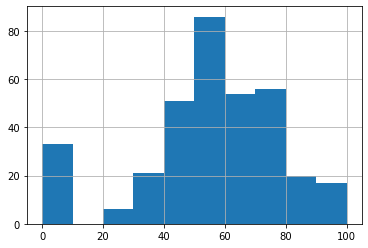

In [35]:
stud[stud.school=="GP"]["score"].hist()

<AxesSubplot:>

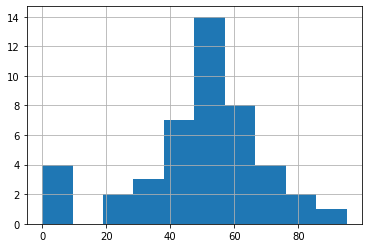

In [36]:
# визуально распределение учеников из разных школ по баллам отличается мало
stud[stud.school=="MS"]["score"].hist()

In [38]:
stud[stud.school=="GP"]["score"].median()

55.0

In [39]:
# медианный балл мало отличается для двух школ
stud[stud.school=="MS"]["score"].median()

50.0

In [40]:
len(stud[(stud.school=="GP")&(stud.score==0)])/len(stud[stud.school=="GP"])*100

9.455587392550143

In [41]:
# процент студентов, получивших 0 баллов, мало отличается для двух школ
len(stud[(stud.school=="MS")&(stud.score==0)])/len(stud[stud.school=="MS"])*100

8.695652173913043

<AxesSubplot:>

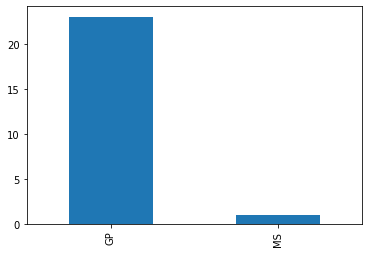

In [42]:
# а вот высокие баллы (85 и выше) значительно чаще получают студенты GP, чем MS
stud[stud.score>=85.0]["school"].value_counts().plot(kind="bar")

In [21]:
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

<AxesSubplot:>

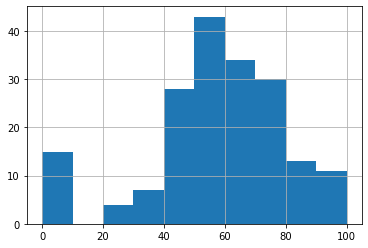

In [23]:
# посмотрим на гистограмму распределения баллов в зависимости от пола
stud[stud.sex=="M"]["score"].hist()

<AxesSubplot:>

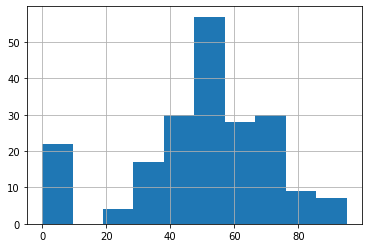

In [24]:
# гистограмма для девочек мало отличается от гистограммы для мальчиков
stud[stud.sex=="F"]["score"].hist()

In [33]:
len(stud[(stud.sex=="M")&(stud.score==0)])/len(stud[stud.sex=="M"])*100

8.02139037433155

In [34]:
# Ноль баллов одинаково часто (в процентном соотношении) получают как мальчики, так и девочки
len(stud[(stud.sex=="F")&(stud.score==0)])/len(stud[stud.sex=="F"])*100

10.576923076923077

In [26]:
stud[stud.sex=="M"]["score"].median()

55.0

In [27]:
# медианное значение балла по математике не отличается для мальчиков и девочек
stud[stud.sex=="F"]["score"].median()

55.0

<AxesSubplot:>

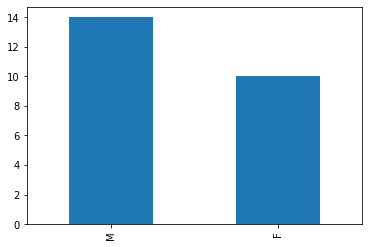

In [29]:
# высокие баллы (85 и выше) чаще получают мальчики
stud[stud.score>=85.0]["sex"].value_counts().plot(kind="bar")

In [43]:
stud.address.value_counts()

U    295
R     83
Name: address, dtype: int64

<AxesSubplot:>

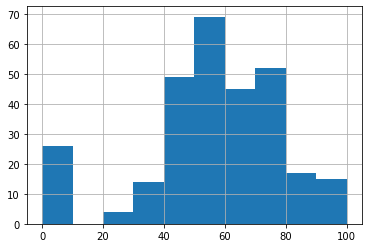

In [44]:
stud[stud.address=="U"]["score"].hist()

<AxesSubplot:>

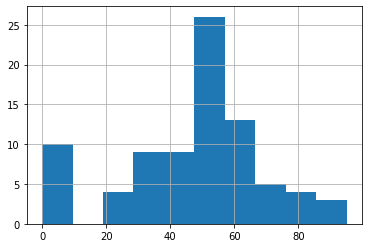

In [45]:
# Как видно из гистограммы, студенты, живущие в деревне, реже получают высокие баллы, чем студенты, живущие в городе. 
# Проверим, так ли это.
stud[stud.address=="R"]["score"].hist()

<AxesSubplot:>

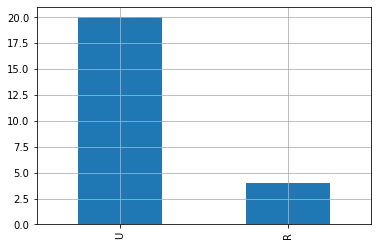

In [46]:
# Действительно, высокие баллы чаще получают студенты, живущие в городе
stud[stud.score>=85.0]["address"].value_counts().plot(kind="bar", grid=True)

In [49]:
len(stud[(stud.address=="U")&(stud.score==0)])/len(stud[stud.address=="U"])*100

8.813559322033898

In [50]:
# Студенты из деревни чуть чаще получают ноль баллов, чем студенты из города
len(stud[(stud.address=="R")&(stud.score==0)])/len(stud[stud.address=="R"])*100

12.048192771084338

<AxesSubplot:>

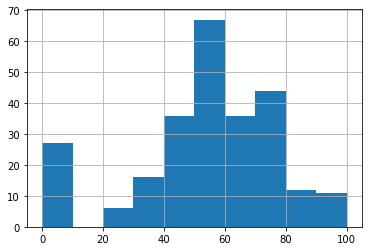

In [60]:
stud[stud.famsize=="GT3"]["score"].hist()

<AxesSubplot:>

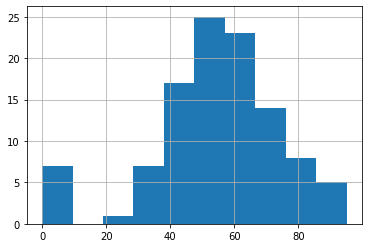

In [61]:
# Распределение студентов с разными размерами семьи по баллам мало отличается
stud[stud.famsize=="LE3"]["score"].hist()

<AxesSubplot:>

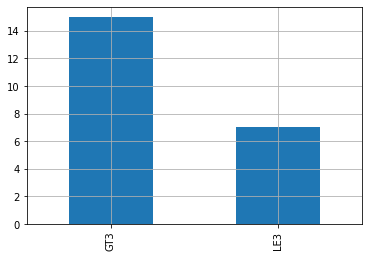

In [62]:
# Высокие баллы чаще получают студенты из больших семей
stud[stud.score>=85.0]["famsize"].value_counts().plot(kind="bar", grid=True)

<AxesSubplot:>

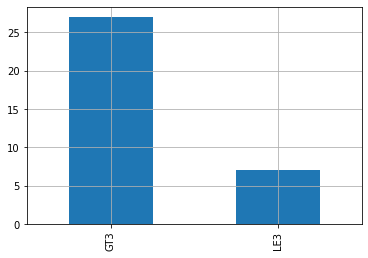

In [63]:
# Удивительно, но ноль баллов тоже чаще получают студенты из больших семей
stud[stud.score==0.0]["famsize"].value_counts().plot(kind="bar", grid=True)

<AxesSubplot:>

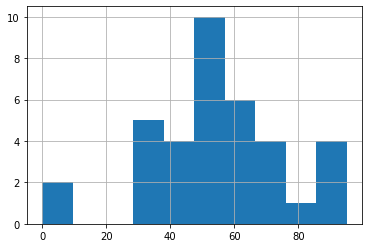

In [64]:
stud[stud.Pstatus=="A"]["score"].hist()

<AxesSubplot:>

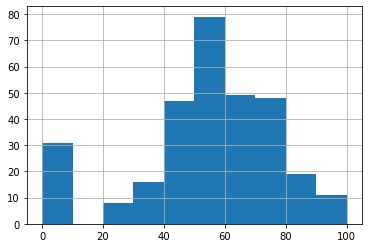

In [65]:
# Распределение баллов в зависимости от статуса семьи мало отличается
stud[stud.Pstatus=="T"]["score"].hist()

<AxesSubplot:>

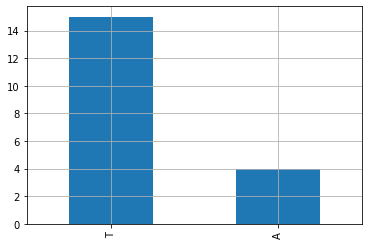

In [67]:
stud[stud.score>=85.0]["Pstatus"].value_counts().plot(kind="bar", grid=True)
# Высокие баллы чаще получают студенты, родители которых живут вместе

<AxesSubplot:>

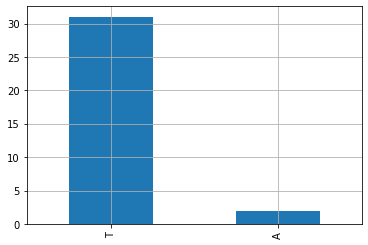

In [69]:
stud[stud.score==0.0]["Pstatus"].value_counts().plot(kind="bar", grid=True)
# Ноль баллов тоже чаще получают студенты, родители которых живут вместе

<AxesSubplot:xlabel='Mjob'>

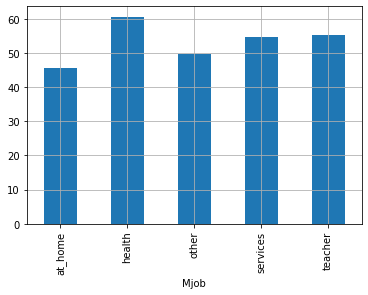

In [71]:
stud.groupby("Mjob")["score"].mean().plot(kind="bar", grid=True)
# Самый высокий средний балл получают студенты, матери которых работают в срефе здравоохранения

<AxesSubplot:>

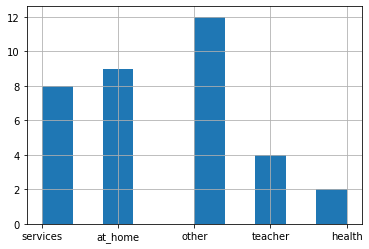

In [75]:
stud[stud.score==0.0]["Mjob"].hist()
# Чаще всего ноль баллов получают студенты, матери которых работают в категории other

<AxesSubplot:>

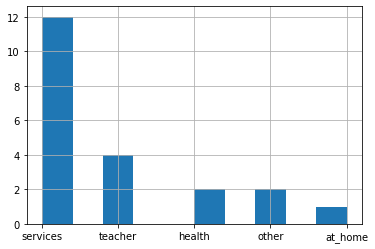

In [77]:
stud[stud.score>=85.0]["Mjob"].hist()
# Выше 85 баллов значительно чаще получают студенты, матери которых работают на госслужбе

<AxesSubplot:xlabel='paid,schoolsup,famsup'>

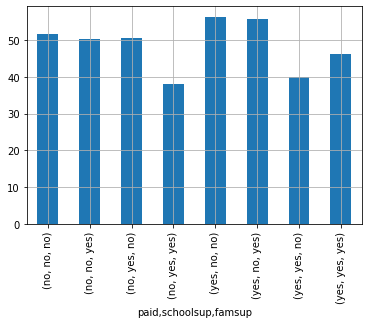

In [81]:
# Можно группировать данные по нескольким категориям одновременно. Но тогда из них сложнее делать выводы. Лучше группировать 
# по одной категории
stud.groupby(by=["paid","schoolsup","famsup"])["score"].mean().plot(kind="bar", grid=True)

In [111]:
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## Визуализация номинативных переменных и t-тест

In [8]:
# возьмем функцию из учебного примера для построения графиков типа boxplot для номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

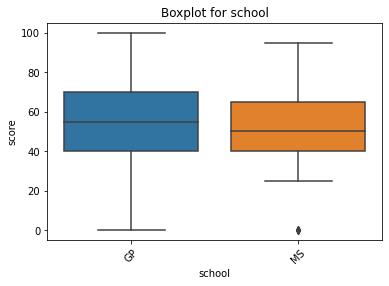

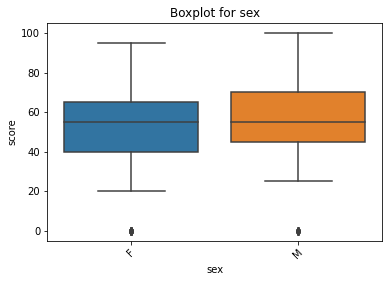

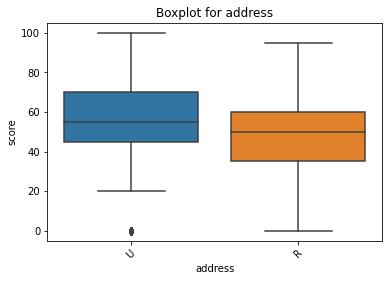

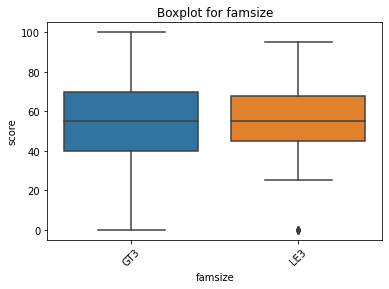

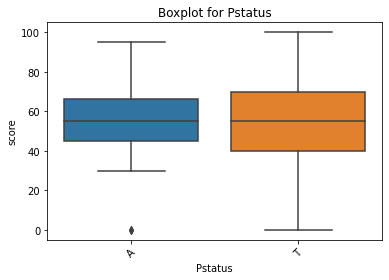

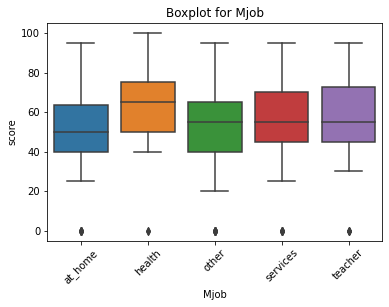

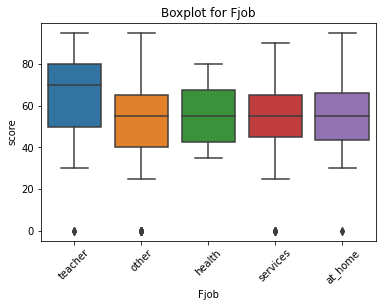

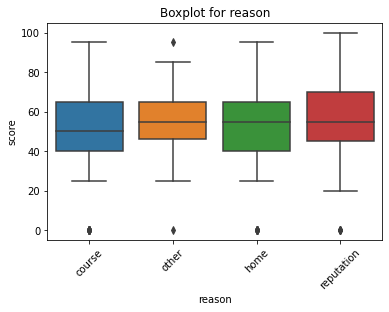

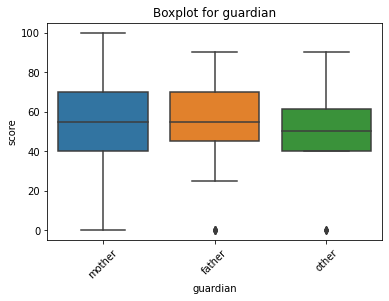

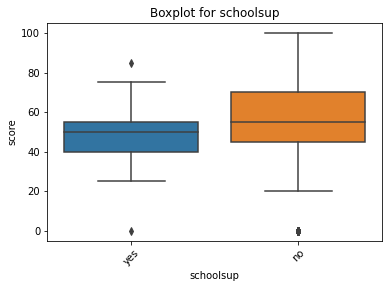

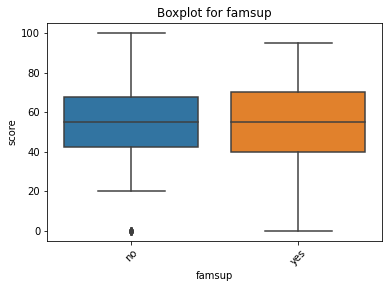

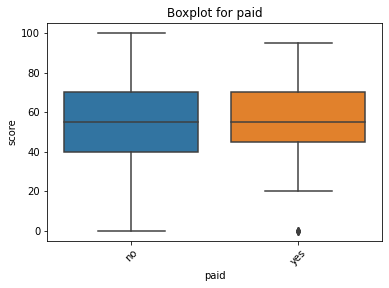

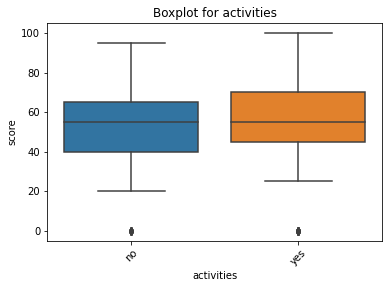

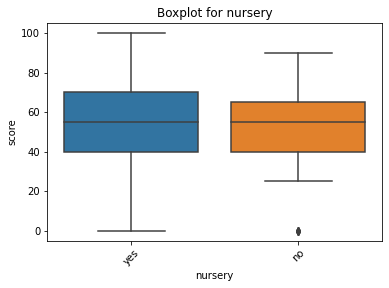

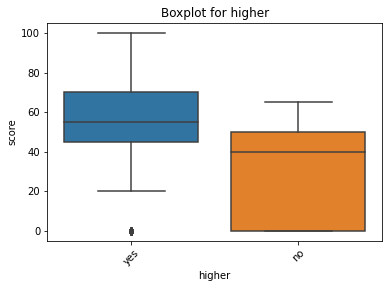

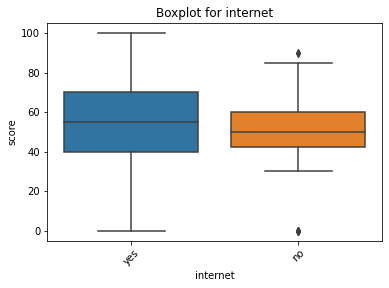

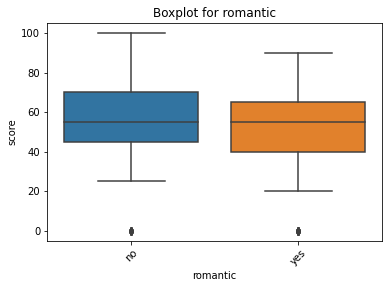

In [9]:
for col in ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian",
           "schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]:
    get_boxplot(col)
    
# как видно из графиков, на распределение признака оказывают влияние все параметры, кроме sex, famsize, Pstatus, famsup, paid, 
# activities, nursery, romantic. Необходимо проверить это с помощью t-теста

In [34]:
# возьмем функцию из учебного примера. Применим ее для оценки с помощью критерия Стьюдента, отличается ли статистическое 
# распределение признака score для каждой колонки датасета
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [38]:
# Важный вопрос: к какому типу относить некоторые колонки - к номинативному или числовому? Речь идет о колонках Medu, Fedu,
# traveltime, studytime, failures, famrel, freetime, goout, health. Выше мы отнесли их к числовому типу. Но они могут быть также
# отнесены к номинативному типу. Посчитаем критерий Стьюдента вообще для всех спорных колонок.
for col in ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian", "Medu", 
            "Fedu","traveltime","studytime","failures", "schoolsup","famsup","paid","activities","nursery","higher",
            "internet","romantic","famrel","freetime","goout","health"]:
    get_stat_dif(col)
#     Видим, что статистически значимой получилась только ода колонка - Mjob. Возьмем ее для будущего расчета модели. Кроме того, 
# мы видим большое количество ошибок, возникающих при расчете критерия Стьюдента для остальных колонок (неверные значения, 
# отрицательное количество степеней свободы и т.д.) Значит, велика вероятность, что критерий Стьюдента для 
# некоторых колонок был посчитан неверно.

Найдены статистически значимые различия для колонки Mjob


C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeW

In [39]:
# Посчитаем критерий Стьюдента вручную для одной из колонок - Fjob. На графике мы видим, что данная колонка должна иметь
# статистические различия. Проверим, так ли это, посчитав критерий Стьюдента.
ttest_ind(stud.loc[stud.loc[:,"Fjob"]=="teacher","score"],stud.loc[stud.loc[:,"Fjob"]=="other","score"])
# Мы видим, что для данной колонки критерий Стюьдента не получилось рассчитать. Значит, мы ничего не можем сказать насчет того,
# стоит или нет данную колонку брать для расчета будущей модели. Похоже, ошибка происходит для всех колонок. Чтобы это понять,
# видоизменим функцию выше.

Ttest_indResult(statistic=nan, pvalue=nan)

In [40]:
def get_stat_dif1(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        k=ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue
        print("Для колонки {0} критерий Стьюдента равен {1} для значений {2} и {3}".format(column,k,comb[0],comb[1]))
        if k<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [41]:
for col in ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian", "Medu", 
            "Fedu","traveltime","studytime","failures", "schoolsup","famsup","paid","activities","nursery","higher",
            "internet","romantic","famrel","freetime","goout","health"]:
    get_stat_dif1(col)
    
# Действительно, мы везде получили nan. Значит, критерий Стьюдента рассчитать не получилось. Значит, мы не можем сказать,
# являются ли наши колонки статистически значимыми.

Для колонки school критерий Стьюдента равен nan для значений GP и MS
Для колонки sex критерий Стьюдента равен nan для значений F и M
Для колонки address критерий Стьюдента равен nan для значений U и R
Для колонки famsize критерий Стьюдента равен nan для значений GT3 и LE3
Для колонки Pstatus критерий Стьюдента равен nan для значений T и A
Для колонки Mjob критерий Стьюдента равен nan для значений other и services
Для колонки Mjob критерий Стьюдента равен nan для значений other и at_home
Для колонки Mjob критерий Стьюдента равен nan для значений other и teacher
Для колонки Mjob критерий Стьюдента равен nan для значений other и health
Для колонки Mjob критерий Стьюдента равен 0.020614443768010304 для значений services и at_home
Для колонки Mjob критерий Стьюдента равен 0.9098063711878448 для значений services и teacher
Для колонки Mjob критерий Стьюдента равен 0.20592558824999138 для значений services и health
Для колонки Mjob критерий Стьюдента равен 0.03180519439576691 для значений at_

C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Sasha\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeW

## Выводы

2. Количество пропусков в каждой колонке относительно небольшое.

3. Была найдена и удалена колонка, не имеющая физического смысла.

3. Сильнее всего итоговый балл по математике скоррелирован с количеством внеученбных неудач. Корреляция отрицательная
(чем меньше неудач, тем выше балл).                                                                                                            

4. Наблюдается неожиданный результат: итоговый балл по математике слабо зависит от количества пропусков по предмету.

5. Для построения модели в дальнейшем будет использоваться только одна колонка с номинативными переменными - Mjob. Расчет критерия Стьюдента показал, что только эта колонка обладает статистическими различиями в распределении признака score. Однако, мы ничего не смогли сказать про остальные колонки, так как для них не получилось посчитать критерий Стьюдента.